In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime

In [2]:
data=pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
 data.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
# Converting into time-series data:

dateparse=lambda dates: pd.datetime.strptime(dates, '%Y-%m')
parse_data= pd.read_csv("AirPassengers.csv", parse_dates=['Month'],
                       index_col='Month', date_parser=dateparse)

parse_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
parse_data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
ts=parse_data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [7]:
#Extract the data using series:

ts['1949-01-01']

112

In [8]:
ts[:'1949-01-01']

Month
1949-01-01    112
Name: #Passengers, dtype: int64

In [9]:
ts[:'1949-06-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
Name: #Passengers, dtype: int64

In [10]:
#Extract data for entire year:

ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

# Checking Stationarity of Time Series

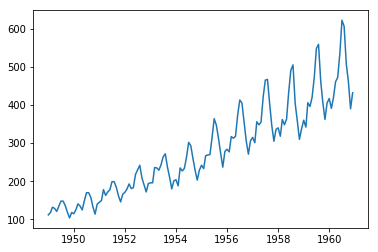

In [11]:
plt.plot(ts)

# Tests used are: Plotting Rolling Statistics  & Dickey Fuller Test or Augmented Dickey Fuller test

In [12]:
from statsmodels.tsa.stattools import adfuller  #Augmented Dickey-Fuller Test

In [13]:
#Computing 3-month moving average:

ts.rolling(3).mean().head()

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01    120.666667
1949-04-01    126.333333
1949-05-01    127.333333
Name: #Passengers, dtype: float64

In [19]:
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    
    rolmean=timeseries.rolling(12).mean()
    rolstd=timeseries.rolling(12).std()
    
    #Plot rolling statstics
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standar Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    
    print('Results of Dickey Fuller Test: ')
    dftest= adfuller(timeseries, autolag='AIC')
    dfoutput= pd.Series(dftest[0:4],
                       index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

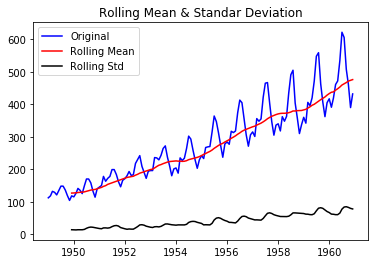

Results of Dickey Fuller Test: 
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [20]:
test_stationarity(ts)

# Estimating & Eliminating Trend:

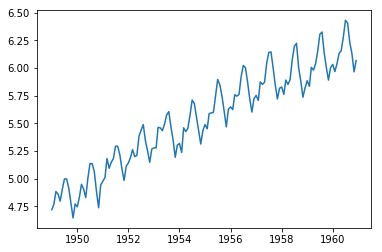

In [21]:
ts_log=np.log(ts)
plt.plot(ts_log)

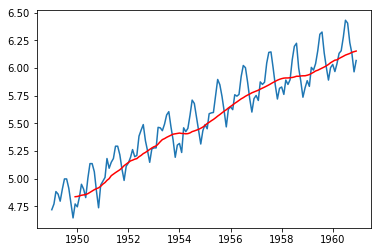

In [22]:
moving_avg=ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [23]:
#Subtract rolling mean from original data:

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: #Passengers, dtype: float64

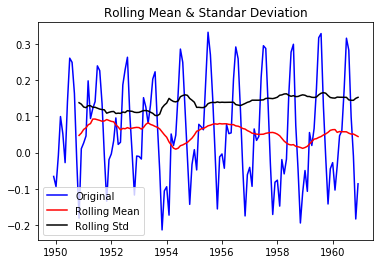

Results of Dickey Fuller Test: 
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [24]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

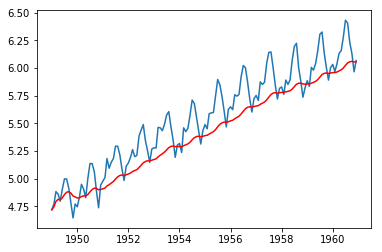

In [25]:
#ewm() is the function used to find exponential weighted moving average. The parameter 'halflife' is used to define the 
#amount of exponential decay:

expweighted_avg= ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')

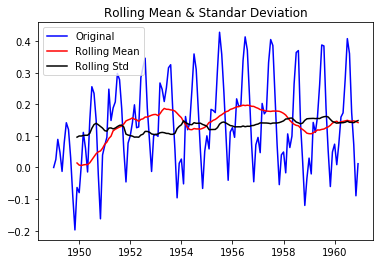

Results of Dickey Fuller Test: 
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [26]:
#Subtract rolling mean from original data:

ts_log_ewma_diff= ts_log -expweighted_avg
test_stationarity(ts_log_ewma_diff)

Differencing:

In [27]:
ts_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64

In [28]:
ts_log.shift().head() #shifted by one

Month
1949-01-01         NaN
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.882802
1949-05-01    4.859812
Name: #Passengers, dtype: float64

In [30]:
ts_log_diff= ts_log- ts_log.shift()
ts_log_diff.head()

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
Name: #Passengers, dtype: float64

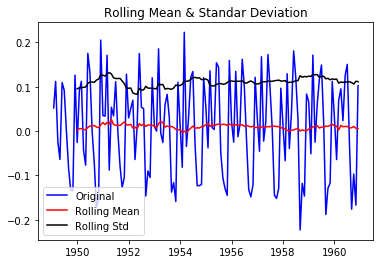

Results of Dickey Fuller Test: 
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [34]:
#ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Decomposing:

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

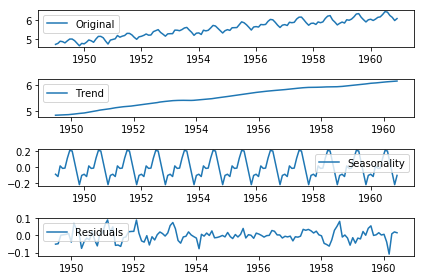

In [37]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

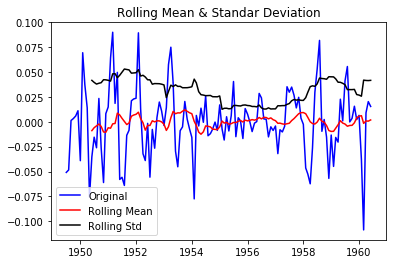

Results of Dickey Fuller Test: 
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [38]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

Time Series Forecasting:

In [39]:
from statsmodels.tsa.stattools import acf, pacf #Auto correlation function & Partial Auto correlation function

Text(0.5, 1.0, 'Autocorrelation Function')

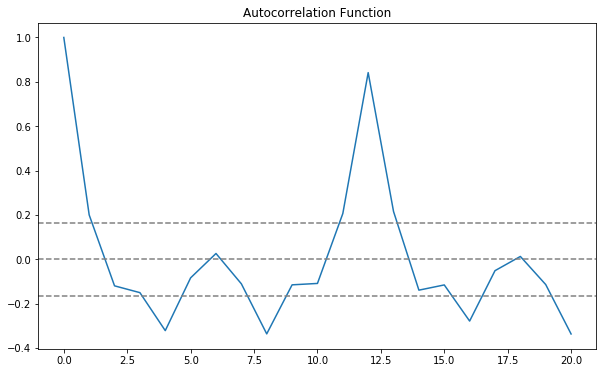

In [40]:
#Plot ACF:

lag_acf = acf(ts_log_diff, nlags=20)
plt.figure(figsize=(10,6))
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y= -1.96/np.sqrt(len(ts_log_diff)), linestyle='--',color='gray') #1.96 is the value for 95% significance
plt.axhline(y= 1.96/np.sqrt(len(ts_log_diff)), linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Autocorrelation Function')

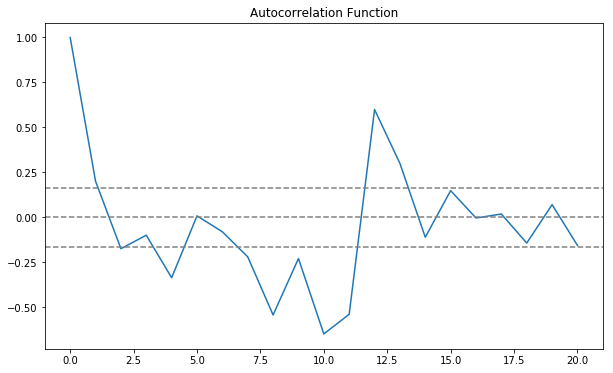

In [41]:
#Plot PACF:

lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
plt.figure(figsize=(10,6))
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y= -1.96/np.sqrt(len(ts_log_diff)), linestyle='--',color='gray') #1.96 is the value for 95% significance
plt.axhline(y= 1.96/np.sqrt(len(ts_log_diff)), linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [43]:
from statsmodels.tsa.arima_model import ARIMA

# AR Model

In [44]:
model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


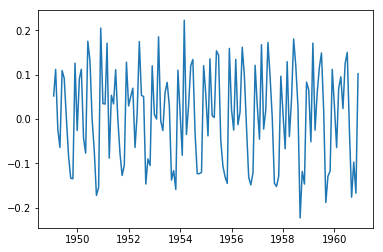

In [45]:
plt.plot(ts_log_diff)

Text(0.5, 1.0, 'RSS: 1.472140')

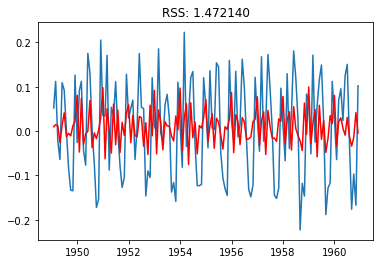

In [50]:
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color ='red')
plt.title('RSS: %4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

# MA Model

In [46]:
model = ARIMA(ts_log, order=(0,1,2))
results_AR = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


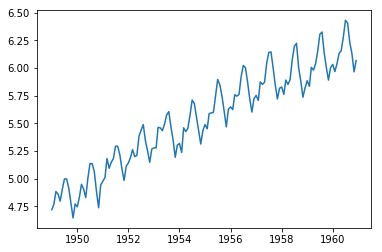

In [48]:
plt.plot(ts_log)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS:1.0292')

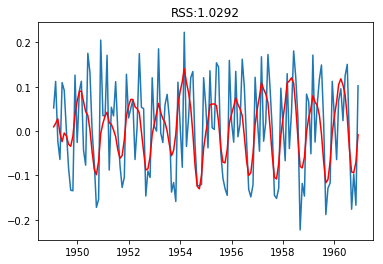

In [49]:
model =ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS:%.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Bringing back the original data

In [52]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64

In [53]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [55]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index = ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)


predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773240
1949-05-01    4.768720
dtype: float64

# Forecasting future values:

In [60]:
forecast= results_ARIMA.forecast(steps=36)[0]
forecast

array([6.09553396, 6.1528141 , 6.22442975, 6.29241111, 6.34164724,
       6.36359368, 6.3578469 , 6.33139308, 6.29597545, 6.26447721,
       6.24738335, 6.25025182, 6.27275846, 6.3094032 , 6.35151498,
       6.38988657, 6.4172738 , 6.43011052, 6.42906688, 6.4184249 ,
       6.40456159, 6.39403622, 6.39183091, 6.40019512, 6.418337  ,
       6.44295413, 6.46937437, 6.49293985, 6.51024116, 6.5198903 ,
       6.52267576, 6.52112387, 6.51864529, 6.51853694, 6.52311928,
       6.53322366])

In [70]:
forecast_actual = np.exp(forecast)

In [71]:
date_index= pd.date_range(start='1/1961', end='12/1963',
                         freq = pd.offsets.MonthBegin())
date_index

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [72]:
forecast_actual= pd.Series(forecast_actual, index= date_index)
forecast_actual.head()

1961-01-01    443.870990
1961-02-01    470.038261
1961-03-01    504.935021
1961-04-01    540.454854
1961-05-01    567.730733
Freq: MS, dtype: float64

In [73]:
updated_data=ts.append(forecast_actual)

In [75]:
updated_data.tail()

1963-08-01    679.341446
1963-09-01    677.659730
1963-10-01    677.586311
1963-11-01    680.698369
1963-12-01    687.611269
dtype: float64

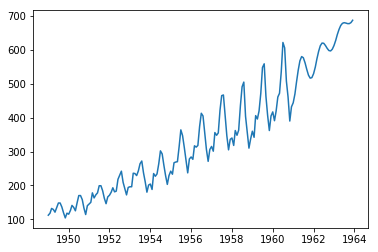

In [80]:
plt.plot(updated_data)

Alternatively:

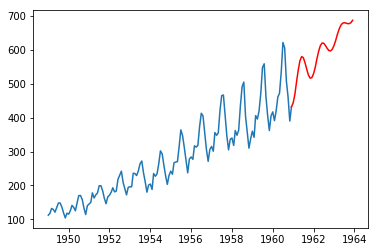

In [82]:
plt.plot(updated_data[:'1960'])
plt.plot(updated_data['1960-12-01':], color='red')